In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)
df = pd.read_csv('data/data.csv')

**Формирование тренировочного и тестового датасета**

In [2]:
df_test = df[df['Дата окончания поиска'].isnull()].drop([''])
df_train = df.dropna(subset=['Дата окончания поиска'])

KeyError: "[''] not found in axis"

**Формирование столбца общего времени разработки и удаление зависимых от этой фичи признаков**

In [ ]:
pd.options.mode.chained_assignment = None

df_train['Общее время разработки'] = (pd.to_datetime(df_train['Дата окончания поиска']) - pd.to_datetime(df_train['Дата начала поиска'])).dt.total_seconds()
df_train = df_train.drop(['Общее время поиска', 'Общее время активного поиска', 'Общее время простоев', 'Дата окончания поиска', 'Дата начала поиска'], axis=1)

df_test['Общее время разработки'] = (pd.to_datetime(df_test['Дата окончания поиска']) - pd.to_datetime(df_test['Дата начала поиска'])).dt.total_seconds()
df_test = df_test.drop(['Общее время поиска', 'Общее время активного поиска', 'Общее время простоев', 'Дата окончания поиска', 'Дата начала поиска'], axis=1)

**После формирование одного столбца с общим временем простоев, удаление множества столбцов с различными подсчетами простоев, которые в итоге зависят от признака общего количество простоев при поиске - в доказательство этого все значения простоев при суммировании равны значению столбца "Количество простоев в поиске" + во всех столбцах про количество простоев одинаковое количество пустых ячеек. Также я смотрел количество нулевых ячеек, очень много ячеек в столбцах с простоем - я хотел их удалить сначала, но после понял, что нужно сформировать отдельный признак. Делаю предположение, что ячейка "Количество простоев в поиске является суммой всех, так как при анализе такой ячейки в ней значение равно или больше суммы всех значений ячеек с простоем + у нее доля нулевых значений не доминирующая (в отличии от других ячеек) - можно heatmap построить**

In [ ]:
df_train['Общее количество простоев'] = df_train['Количество простоев в поиске']
df_train = df_train.drop(['Количество простоев по метеоусловиям', 'Количество простоев', 'Количество простоев без виновника', 'Количество простоев по вине королевства',
                          'Количество простоев в наклонном поиске', 'Количество простоев по зельям', 'Количество простоев в контроле поиска', 
                          'Количество простоев в конце расщелины', 'Количество простоев по долбилам', 'Количество простоев по вине исследователей', 
                          'Количество простоев по креплениям', 'Количество простоев (прочие)', 'Количество простоев в поиске'], axis=1)

df_test['Общее количество простоев'] = df_test['Количество простоев в поиске']
df_test = df_test.drop(['Количество простоев по метеоусловиям', 'Количество простоев', 'Количество простоев без виновника', 'Количество простоев по вине королевства',
                          'Количество простоев в наклонном поиске', 'Количество простоев по зельям', 'Количество простоев в контроле поиска', 
                          'Количество простоев в конце расщелины', 'Количество простоев по долбилам', 'Количество простоев по вине исследователей', 
                          'Количество простоев по креплениям', 'Количество простоев (прочие)', 'Количество простоев в поиске'], axis=1)

df_train['Общее количество простоев'] = df_train['Общее количество простоев'].fillna(0)
df_test['Общее количество простоев'] = df_test['Общее количество простоев'].fillna(0)

**Проверка зависимости между признаками осложнений, браков и ремонтов - слабая зависимость**

In [ ]:
# # df_train_corr = df_train[['Количество ремонтов', 'Количество осложнений', 'Количество геологических осложнений', 'Количество брака', 'Количество аварий']]
# df_train_corr = df_train[['Количество осложнений', 'Количество геологических осложнений']]
# # df_train_corr = df_train[['Количество ремонтов', 'Количество брака', 'Количество аварий']]
# sns.heatmap(
#     df_train_corr.corr(),        
#     cmap='RdBu_r', # задаёт цветовую схему
#     annot=False, # рисует значения внутри ячеек
#     vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

In [ ]:
# df_train_corr.corr()

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# df_train_vif = df_train_corr.dropna()
# VIFs = pd.DataFrame()
# VIFs['Variable'] = df_train_vif.columns
# VIFs['VIF'] = [variance_inflation_factor(df_train_vif.values, i) for i in range(df_train_vif.shape[1])]
# VIFs

**Отбор фич используя расстояния Пирсона**

In [ ]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# select = SelectKBest(chi2, k=5)
# X_new = select.fit_transform(xx, y_train)

**Отбор фич по wrapper**

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
 
# lr = LinearRegression()
# rfe = RFE(lr, n_features_to_select=2, step=1)
# selector = rfe.fit_transform(xx, y_train)

**Использование регуляризации**

**Пока удалим категориальные фичи, которых больше пустых, чем полных**

In [ ]:
df_train = df_train.drop(['Тип инструмента', 'Помощник по подвескам', 'Помощник по вырезке окна', 'Глубина первого отвилка', 'Путь поиска в первом отвилке', 
                          'Количество осложнений', 'Количество дополнительных отвилков', 'Количество пилотных отвилков', 'Количество аварий', 'Количество брака', 
                          'Количество геологических осложнений',
                          'Количество осложнений', 'Статус поиска'], axis=1)

In [ ]:
df_train = df_train.drop(['Наименование королевства', 'Наименование земли', 'Наименование хребта', 'Наименование расщелины'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_le = df_train.copy()
df_le.loc[:, 'Помощник по контролю поиска'] = le.fit_transform(df_le.loc[:, 'Помощник по контролю поиска'])
df_le.loc[:, 'Помощник по поиску'] = le.fit_transform(df_le.loc[:, 'Помощник по поиску'])
df_le.loc[:, 'Помощник по наклонным расщелинам'] = le.fit_transform(df_le.loc[:, 'Помощник по наклонным расщелинам'])
df_le.loc[:, 'Помощник по зельям'] = le.fit_transform(df_le.loc[:, 'Помощник по зельям'])
df_le.loc[:, 'Помощник по долбилам'] = le.fit_transform(df_le.loc[:, 'Помощник по долбилам'])
df_le.loc[:, 'Помощник по исследованиям'] = le.fit_transform(df_le.loc[:, 'Помощник по исследованиям'])
df_le.loc[:, 'Помощник по укреплению'] = le.fit_transform(df_le.loc[:, 'Помощник по укреплению'])
df_le.loc[:, 'Помощник по огненным заклятиям'] = le.fit_transform(df_le.loc[:, 'Помощник по огненным заклятиям'])

df_le.loc[:, 'Цель'] = le.fit_transform(df_le.loc[:, 'Цель'])
df_le.loc[:, 'Тип расщелины'] = le.fit_transform(df_le.loc[:, 'Тип расщелины'])
df_le.loc[:, 'Категория расщелины'] = le.fit_transform(df_le.loc[:, 'Категория расщелины'])
df_le.loc[:, 'Назначение расщелины'] = le.fit_transform(df_le.loc[:, 'Назначение расщелины'])
df_le.loc[:, 'Участки'] = le.fit_transform(df_le.loc[:, 'Участки'])
df_le.loc[:, 'Тип отвилка'] = le.fit_transform(df_le.loc[:, 'Тип отвилка'])
df_le.loc[:, 'Технологическая особенность'] = le.fit_transform(df_le.loc[:, 'Технологическая особенность'])

In [ ]:
df_le['Глубина по отвилку'] = df_le['Глубина по отвилку'].fillna(df_le['Глубина по отвилку'].mode().iloc[0])
df_le['Количество ремонтов'] = df_le['Количество ремонтов'].fillna(0)
df_le['Количество труб'] = df_le['Количество труб'].fillna(df_le['Количество труб'].mode().iloc[0])
df_le['Общий путь поиска'] = df_le['Общий путь поиска'].fillna(df_le['Общий путь поиска'].mode().iloc[0])

**Формирование X and y**

In [ ]:
X_train = df_le.drop(['Общее время разработки'], axis=1)
y_train = pd.DataFrame({'Общее время разработки' : df_le['Общее время разработки']})

In [ ]:
df_test = df_test.drop(['Тип инструмента', 'Помощник по подвескам', 'Помощник по вырезке окна', 'Глубина первого отвилка', 'Путь поиска в первом отвилке', 
                          'Количество осложнений', 'Количество дополнительных отвилков', 'Количество пилотных отвилков', 'Количество аварий', 'Количество брака', 
                          'Количество геологических осложнений',
                          'Количество осложнений', 'Статус поиска', 
                          'Наименование королевства', 'Наименование земли', 'Наименование хребта', 'Наименование расщелины'], axis=1)

le_test = LabelEncoder()
df_le_test = df_test.copy()
df_le_test.loc[:, 'Помощник по контролю поиска'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по контролю поиска'])
df_le_test.loc[:, 'Помощник по поиску'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по поиску'])
df_le_test.loc[:, 'Помощник по наклонным расщелинам'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по наклонным расщелинам'])
df_le_test.loc[:, 'Помощник по зельям'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по зельям'])
df_le_test.loc[:, 'Помощник по долбилам'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по долбилам'])
df_le_test.loc[:, 'Помощник по исследованиям'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по исследованиям'])
df_le_test.loc[:, 'Помощник по укреплению'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по укреплению'])
df_le_test.loc[:, 'Помощник по огненным заклятиям'] = le_test.fit_transform(df_le_test.loc[:, 'Помощник по огненным заклятиям'])

df_le_test.loc[:, 'Цель'] = le_test.fit_transform(df_le_test.loc[:, 'Цель'])
df_le_test.loc[:, 'Тип расщелины'] = le_test.fit_transform(df_le_test.loc[:, 'Тип расщелины'])
df_le_test.loc[:, 'Категория расщелины'] = le_test.fit_transform(df_le_test.loc[:, 'Категория расщелины'])
df_le_test.loc[:, 'Назначение расщелины'] = le_test.fit_transform(df_le_test.loc[:, 'Назначение расщелины'])
df_le_test.loc[:, 'Участки'] = le_test.fit_transform(df_le_test.loc[:, 'Участки'])
df_le_test.loc[:, 'Тип отвилка'] = le_test.fit_transform(df_le_test.loc[:, 'Тип отвилка'])
df_le_test.loc[:, 'Технологическая особенность'] = le_test.fit_transform(df_le_test.loc[:, 'Технологическая особенность'])

df_le_test['Глубина по отвилку'] = df_le_test['Глубина по отвилку'].fillna(df_le_test['Глубина по отвилку'].mode().iloc[0])
df_le_test['Количество ремонтов'] = df_le_test['Количество ремонтов'].fillna(0)
df_le_test['Количество труб'] = df_le_test['Количество труб'].fillna(df_le_test['Количество труб'].mode().iloc[0])
df_le_test['Общий путь поиска'] = df_le_test['Общий путь поиска'].fillna(df_le_test['Общий путь поиска'].mode().iloc[0])

In [ ]:
df_le_test = df_le_test.drop(['Общее время разработки'], axis=1)

In [ ]:
X_test = df_le_test.copy()

**Использование рандомных деревьев**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

c:\mArt\dataScience\GPN_Cup\Разветка и добыча нефти\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
feats = {}
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importance

<Axes: xlabel='Gini-Importance', ylabel='Features'>

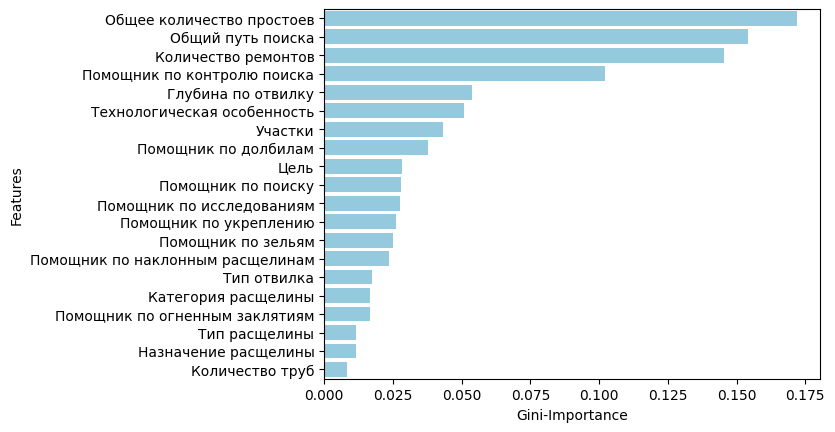

In [ ]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')

In [ ]:
y_test = model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(model,
                      X_train,
                      y_train,
                      scoring='neg_mean_squared_error',
                      cv=20)

mse.mean()

c:\mArt\dataScience\GPN_Cup\Разветка и добыча нефти\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\mArt\dataScience\GPN_Cup\Разветка и добыча нефти\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\mArt\dataScience\GPN_Cup\Разветка и добыча нефти\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\mArt\dataScience\GPN_Cup\Разветка и добыча нефти\.venv\lib\site-packages\sklearn\base.py:1473:

np.float64(-2993651604432.663)